In [1]:
from src.util import gpu_setup
gpu_setup()

5 actual GPUs, 1 in use.


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from src.networks.GUnet_PSF import GUnet

In [4]:
batch_size = 32

In [5]:
model = GUnet(
    [360, 360],
    # depth=4, # There is a problem with subsampling 2x, make sure imsize is a multiple of 2**depth 
    depth=3, 
    conv_layers=2,
    batch_size=batch_size,
    residual=True
    )

In [6]:
true_im = np.load("/share/gpu0/mars/TNG_data/rcGAN/image_fixed/train/x.npy")
dirty_im = np.load("/share/gpu0/mars/TNG_data/rcGAN/image_fixed/train/y.npy")
psf = np.load("/share/gpu0/mars/TNG_data/rcGAN/image_fixed/train/uv.npy")

In [7]:
true_im.shape, dirty_im.shape, psf.shape

((1000, 360, 360), (1000, 360, 360), (1000, 360, 360))

In [8]:
history = model.fit([dirty_im, psf], true_im,  batch_size=batch_size, epochs=25)

Epoch 1/25
32/32 [==============================] - 44s 418ms/step - loss: 0.2133
Epoch 2/25
32/32 [==============================] - 11s 359ms/step - loss: 0.0348
Epoch 3/25
32/32 [==============================] - 11s 352ms/step - loss: 0.0270
Epoch 4/25
32/32 [==============================] - 11s 353ms/step - loss: 0.0237
Epoch 5/25
32/32 [==============================] - 11s 352ms/step - loss: 0.0225
Epoch 6/25
32/32 [==============================] - 11s 352ms/step - loss: 0.0222
Epoch 7/25
32/32 [==============================] - 11s 353ms/step - loss: 0.0216
Epoch 8/25
32/32 [==============================] - 11s 358ms/step - loss: 0.0210
Epoch 9/25
32/32 [==============================] - 11s 352ms/step - loss: 0.0211
Epoch 10/25
32/32 [==============================] - 11s 354ms/step - loss: 0.0204
Epoch 11/25
32/32 [==============================] - 11s 350ms/step - loss: 0.0202
Epoch 12/25
32/32 [==============================] - 11s 351ms/step - loss: 0.0205
Epoch 13/25
3

In [9]:
model.evaluate([dirty_im[:10], psf[:10]], true_im[:10], batch_size=batch_size)

1/1 [==============================] - 4s 4s/step - loss: 0.0178


0.017758196219801903

In [10]:
reconstruction =  model.predict([dirty_im[:10], psf[:10]], batch_size=batch_size)

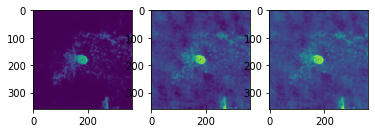

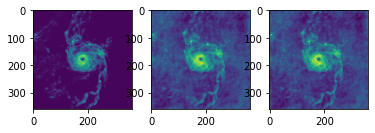

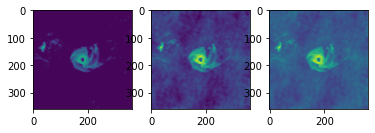

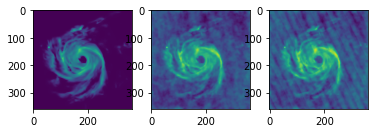

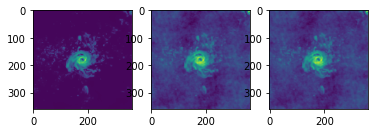

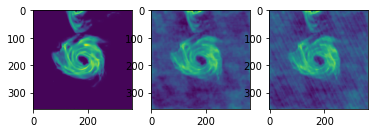

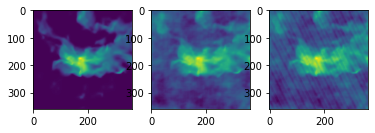

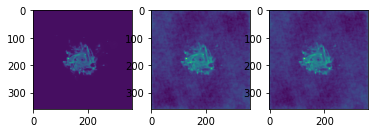

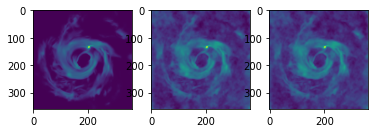

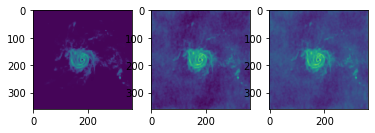

In [20]:
for i in range(10):
    fig, ax =  plt.subplots(ncols=3)
    ax[0].imshow(true_im[i]) 
    ax[1].imshow(dirty_im[i].real) 
    ax[2].imshow(reconstruction[i]) # bad reconstructions after only a few training epochs
    plt.show()

# Some thoughts

This is only a very small amount of training so its too soon to draw any conclusions. However, there seems to be a significant amount of aliasing, but it is difficult to say. It is likely an effect introduced in the gradient of the network, maybe because the magnitude of the gradient is much larger than that of the dirty reconstruction and current iterate. Some hyperparameter/learning rate might be needed to tune this. (Assuming I implemented it correctly) It should even out with more training as well but might take a while. 